#### and

[[0 0]
 [1 0]
 [0 1]
 [1 1]] 의 예측 결과:  [0 0 0 1]
정답률 =  1.0


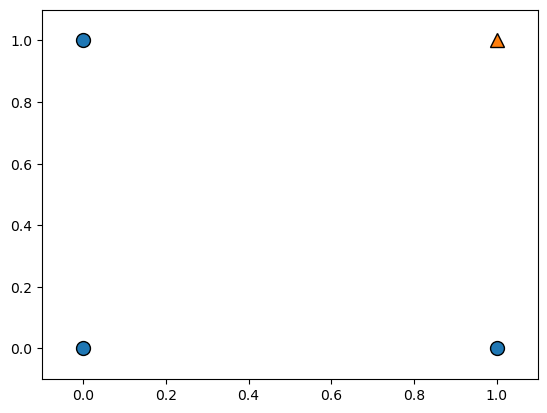

In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

# and 학습용 데이터와 답
learn_data = np.array([[0,0], [1,0], [0,1], [1,1]])
learn_label = np.array([0, 0, 0, 1]) #답
svm = LinearSVC()
svm.fit(learn_data, learn_label)

# 모형의 예측값
X_test = np.array([[0,0], [1,0], [0,1], [1,1]])
pred = svm.predict(X_test)

# 모형 평가
print(X_test , "의 예측 결과: " , pred)
print("정답률 = " , accuracy_score([0, 0, 0, 1], pred))

import mglearn
mglearn.discrete_scatter(learn_data[:,0], learn_data[:,1], learn_label)

#### xor (svm)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train = [[0,0], [1,0], [0,1], [1,1]]
# X xor Y
y_train = [0, 1, 1, 0]

#svm = SVC(kernel='linear') -> 선형모델로는 안됨
    # SVC:분류모형, SVR:회귀모형
svm = SVC(kernel='rbf')     # 비선형모델
svm.fit(X_train, y_train)

# 예측
X_test = [[0,0], [1,0], [0,1], [1,1]]
pred = svm.predict(X_test)

# 평가
print(X_test , "의 예측 결과: " , pred)
print("정답률 = " , accuracy_score([0, 1, 1, 0], pred))

[[0, 0], [1, 0], [0, 1], [1, 1]] 의 예측 결과:  [0 1 1 0]
정답률 =  1.0


#### linear SVM

In [13]:
import numpy as np
X = np.array([[1, 2], [1.5, 3], [3.5, 4], [4, 5], [6, 2], [7,5], [9, 4], [8, 2]])
y = [0, 0, 0, 0, 1, 1, 1, 1]

In [14]:
from sklearn.svm import SVC
#선형 svm 모형
model = SVC(kernel = 'linear')
model.fit(X, y)

SVC(kernel='linear')

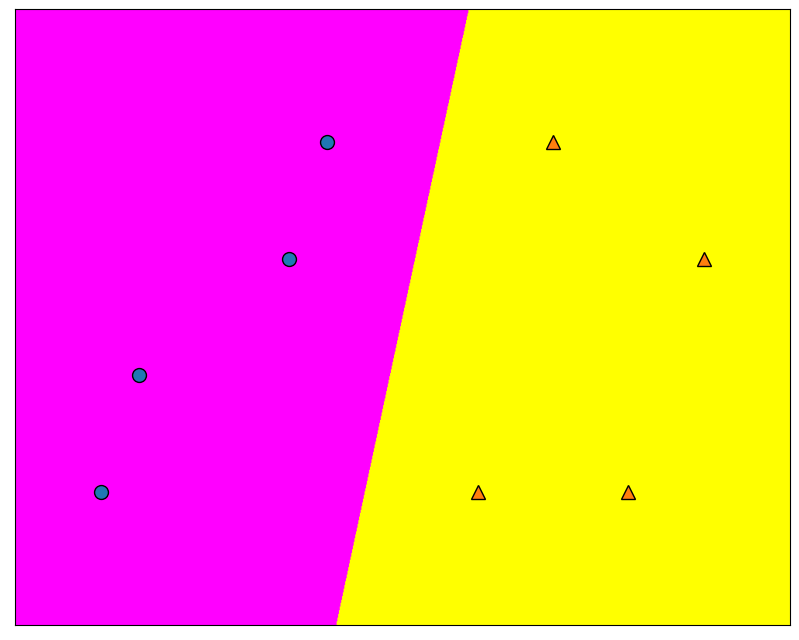

In [15]:
import mglearn
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, cm='spring')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

[0]
[[4. 5.]
 [6. 2.]
 [7. 5.]]


array([3, 4, 5])

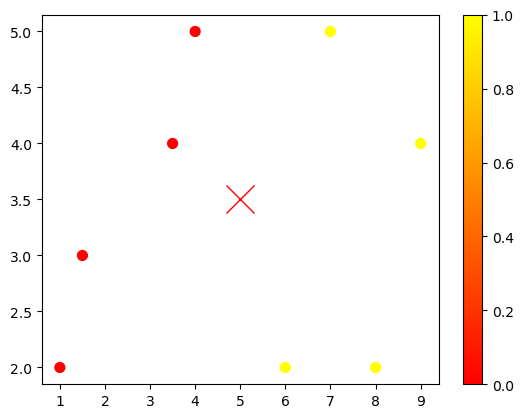

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.plot([5], [3.5], 'x', color='red', markersize=20)
plt.colorbar()
print(model.predict([[5, 3.5]]))

#서포트 벡터 샘플
print(model.support_vectors_)
# 서포트 벡터의 인덱스
model.support_

In [20]:
# 서포트 벡터 그리기
def plot_svc(model,ax=None):
    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치
    #판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P,
                levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])
    # 서포트 벡터 출력
    ax.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[0]
[[4. 5.]
 [6. 2.]
 [7. 5.]]


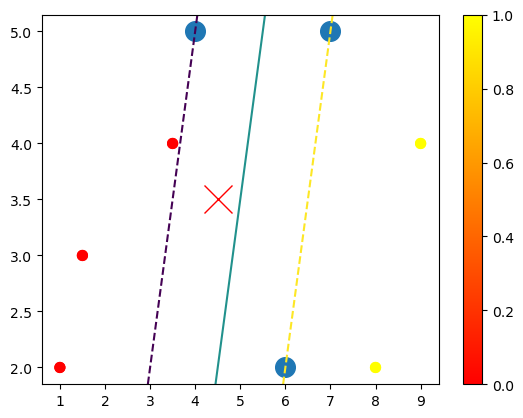

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.plot([4.5], [3.5], 'x', color='red', markersize=20)
plt.colorbar()
print(model.predict([[5, 3.5]]))

#서포트 벡터 샘플
print(model.support_vectors_)
# 서포트 벡터의 인덱스
model.support_

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc(model)

#### 무작위 데이터 (blobs)

In [24]:
from sklearn.datasets import make_blobs
# centers=2 (2 class), cluster_std 클러스터의 표준편차

X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=0)

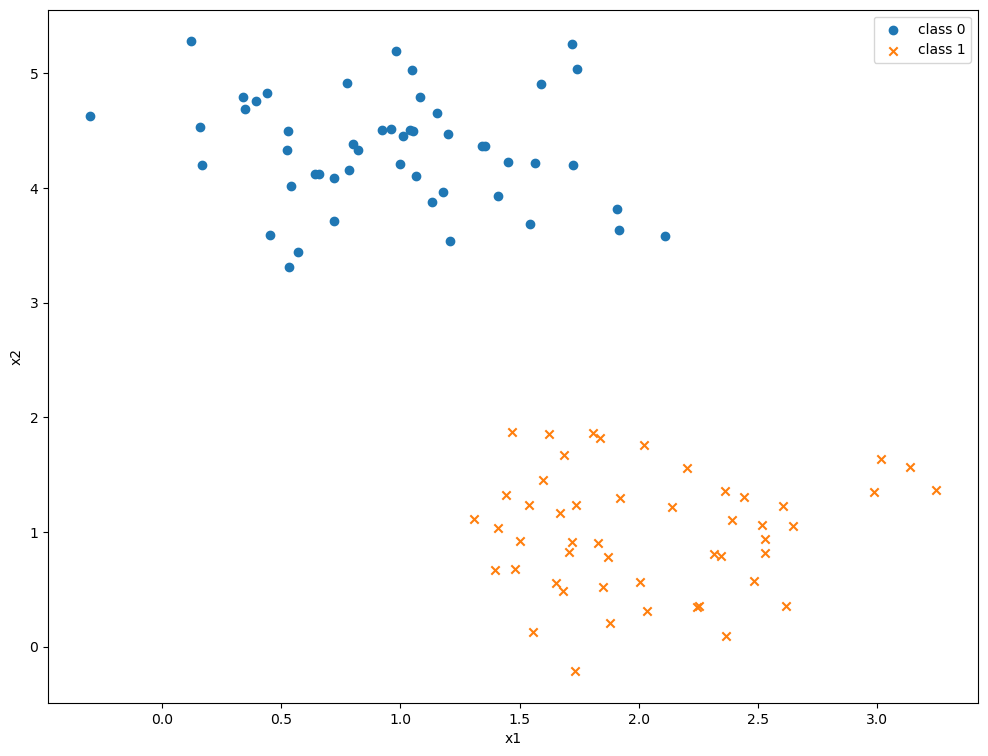

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', label="class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X_train, y_train)

In [29]:
# 클래스별 서포트의 개수(0 2개, 1 1개)
print(model.n_support_)
# 서포트의 인덱스
print(model.support_)
# 서포트 벡터의 값
print(model.support_vectors_)

[2 1]
[18 43 13]
[[0.5323772  3.31338909]
 [2.11114739 3.57660449]
 [1.46870582 1.86947425]]


In [30]:
# 서포트 벡터 그리기
def plot_svc(model,ax=None):
    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치
    #판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P,
                levels=[-1, 0, 1],
                linestyles=['--', '-', '--'])
    # 서포트 벡터 출력
    ax.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=200)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

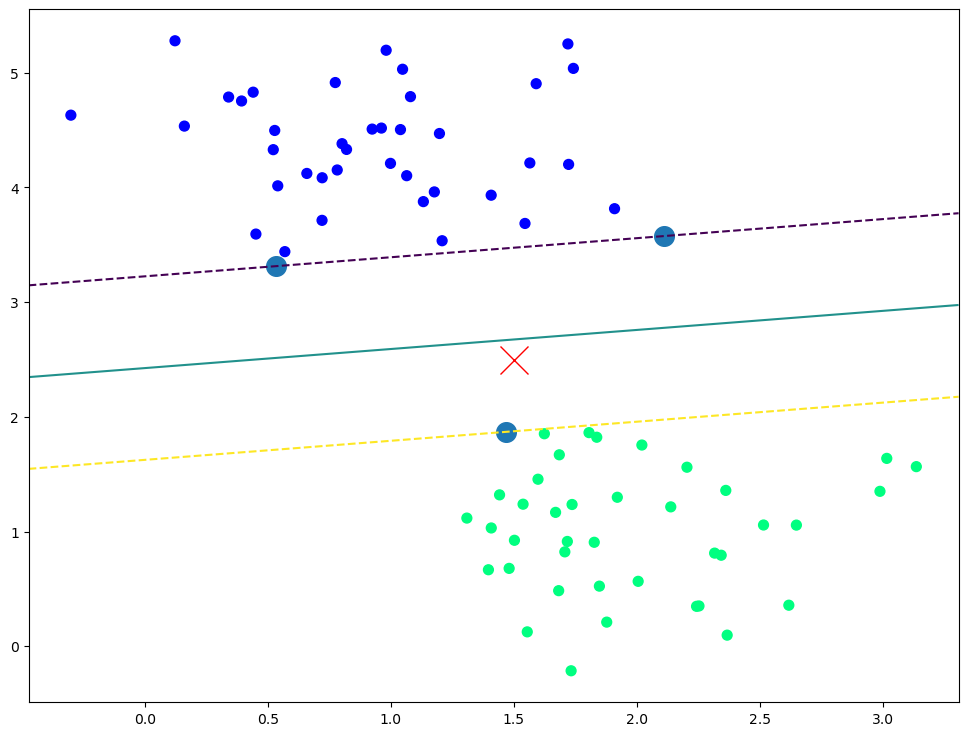

In [31]:
plt.figure(figsize=(12,9))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='winter')

# X_new 데이터는 어느 클래스로 분류될까요?
X_new = [1.5, 2.5]
plt.plot(X_new[0], X_new[1], 'x', color='red', markersize=20)
plot_svc(model)

In [32]:
model.predict([[1.5, 2.5]])

array([1])

In [33]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10, 100], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimators:\n", grid.best_estimator_)

Best Parameters:
 {'C': 0.1, 'gamma': 1}
Best Estimators:
 SVC(C=0.1, gamma=1)


In [34]:
model = grid.best_estimator_
model

SVC(C=0.1, gamma=1)

In [35]:
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 1.0
검증용: 1.0


#### 올리베티 얼굴 데이터셋

In [36]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(set(faces.target))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\tjoeun\scikit_learn_data
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
N = 2 #2행
M = 5 #5열
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.gray)
        ax.xaxis.set_ticks([]) #x축 눈금 제거
        ax.yaxis.set_ticks([]) #y축 눈금 제거
        plt.title(faces.target[k])
plt.tight_layout() #여백 조절
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                        stratify=faces.target, test_size=0.2, random_state=0)

from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)

In [ ]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64),
        cmap=plt.cm.gray)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        pred=svc.predict(X_test[k:(k + 1), :])[0]
        plt.title(f"{y_test[k]} => {pred}")
plt.tight_layout()
plt.show()

In [40]:
print("학습용:",svc.score(X_train, y_train))
print("검증용:",svc.score(X_test, y_test))

학습용: 1.0
검증용: 0.95


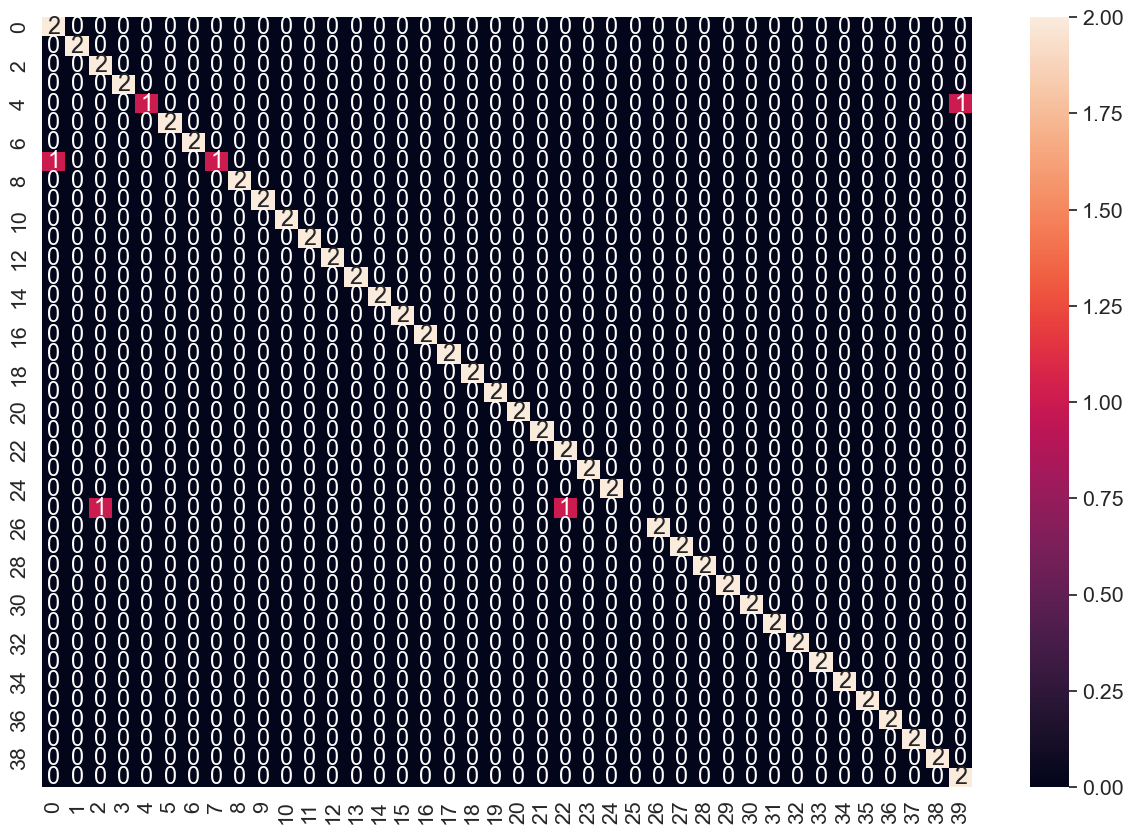

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

pred = svc.predict(X_test)
cm=confusion_matrix(y_test, pred) # 정오분류표
# 데이터프레임으로 변환
df_cm=pd.DataFrame(cm, index=range(0,40),columns=range(0,40))
sns.set(font_scale=1.4)
plt.figure(figsize=(15,10))
sns.heatmap(df_cm, annot=True) #히트맵 출력
plt.show()

In [42]:
print(classification_report(y_test, pred))
# class 4,7은 정확도가 낮음(f1-score 기준)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

c:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
import sys
print(sys.getsizeof(X_train))
print(sys.getsizeof(X_train)/(1024*1024)) # 메모리 용량 계산 5MB

5243000
5.000114440917969


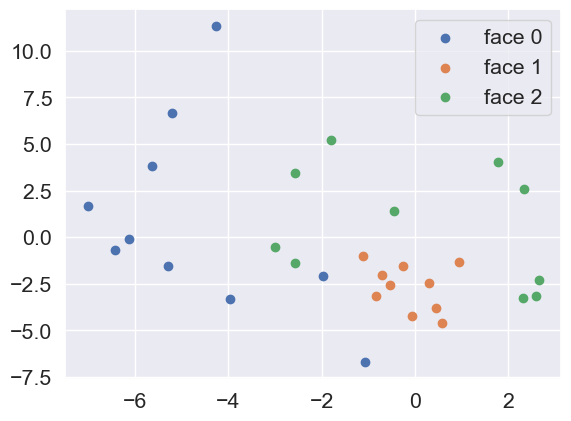

In [49]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

pca=PCA(n_components=2, random_state=10)
components=pca.fit_transform(faces.data)
df=pd.DataFrame(data=components, columns=['component 1','component 2'])
df.index=faces.target
#plt.figure(figsize=(20,15))
for i in range(3):
    plt.scatter(df.iloc[faces.target == i, 0], df.iloc[faces.target == i, 1],  label=f'face {i}')
    plt.legend()
plt.show()

#### cost, gamma

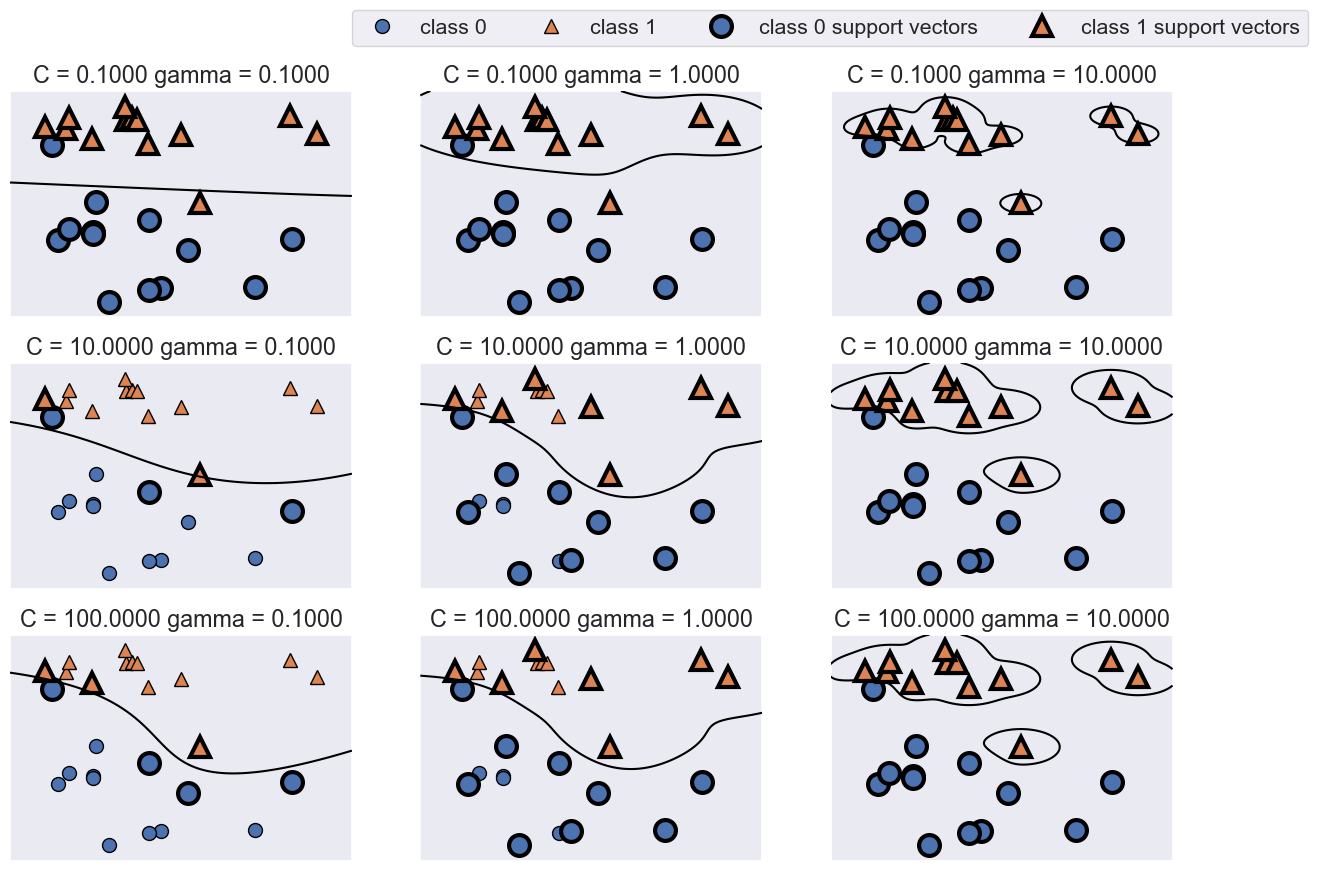

In [52]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 1, 2]):
    for a, gamma in zip(ax, [-1, 0, 1]):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

#ncol=4 4개의 셀을 합쳐서 범례 표시
axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", 
                    "class 1 support vectors"], ncol=4, loc=(1, 1.2))

#### 서포트 벡터와 Cost, gamma

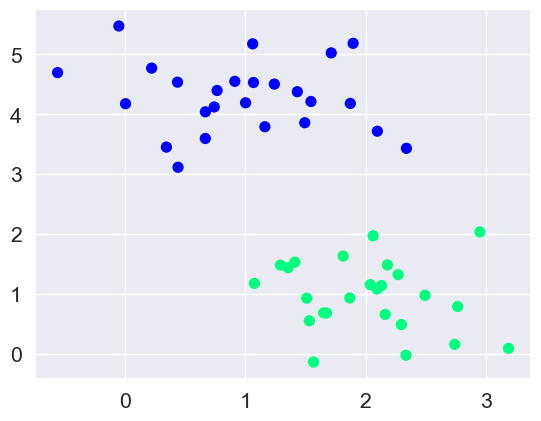

In [54]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

(-1.0, 3.5)

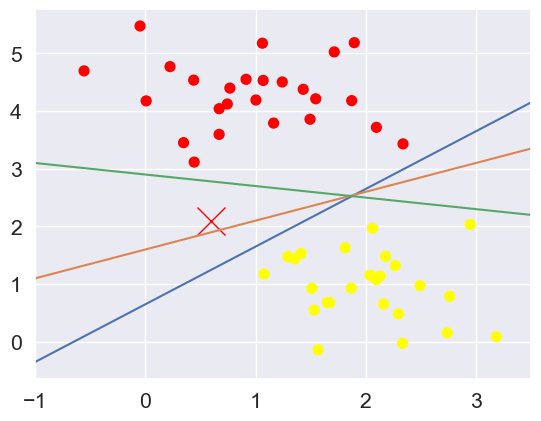

In [56]:
import numpy as np
xfit = np.linspace(-1, 3.5, 10) # -1 ~ 3.5 10등분
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# X 데이터는 어느 클래스로 분류될까요?
plt.plot([0.6], [2.1], 'x', color='red', markersize=20)

#기울기와 절편에 따라 구분선이 달라짐
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b)
plt.xlim(-1, 3.5)

In [57]:
from sklearn.svm import SVC
#선형분류 linear, 비선형분류 rbf(기본값)
model = SVC(kernel='linear')
#model = SVC()
model.fit(X, y)

SVC(kernel='linear')

In [58]:
#서포트 벡터의 좌표값
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

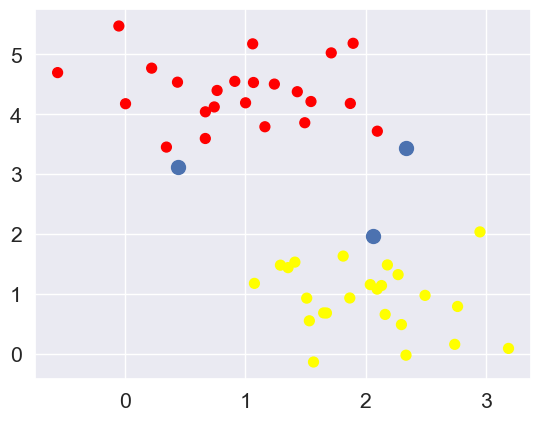

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=100)

In [60]:
a,b = np.meshgrid([10,20],[30,40])
#print(a)
#print(a.ravel()) # 행렬을 1차원 배열로 만드는 함수
#print(a.ravel().T) # 행렬전치, Transposition Arrays and Swapping Axes
c = np.vstack([a.ravel(), b.ravel()]).T
#c = np.vstack([a.ravel(), b.ravel()])
print(c)

[[10 30]
 [20 30]
 [10 40]
 [20 40]]


In [ ]:
# def plot_svc(model,ax=None):
# 위에랑 같은 함수

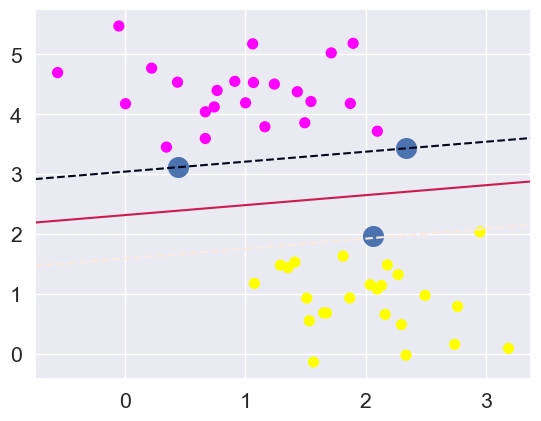

In [62]:
#서포트 벡터 표시
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc(model)

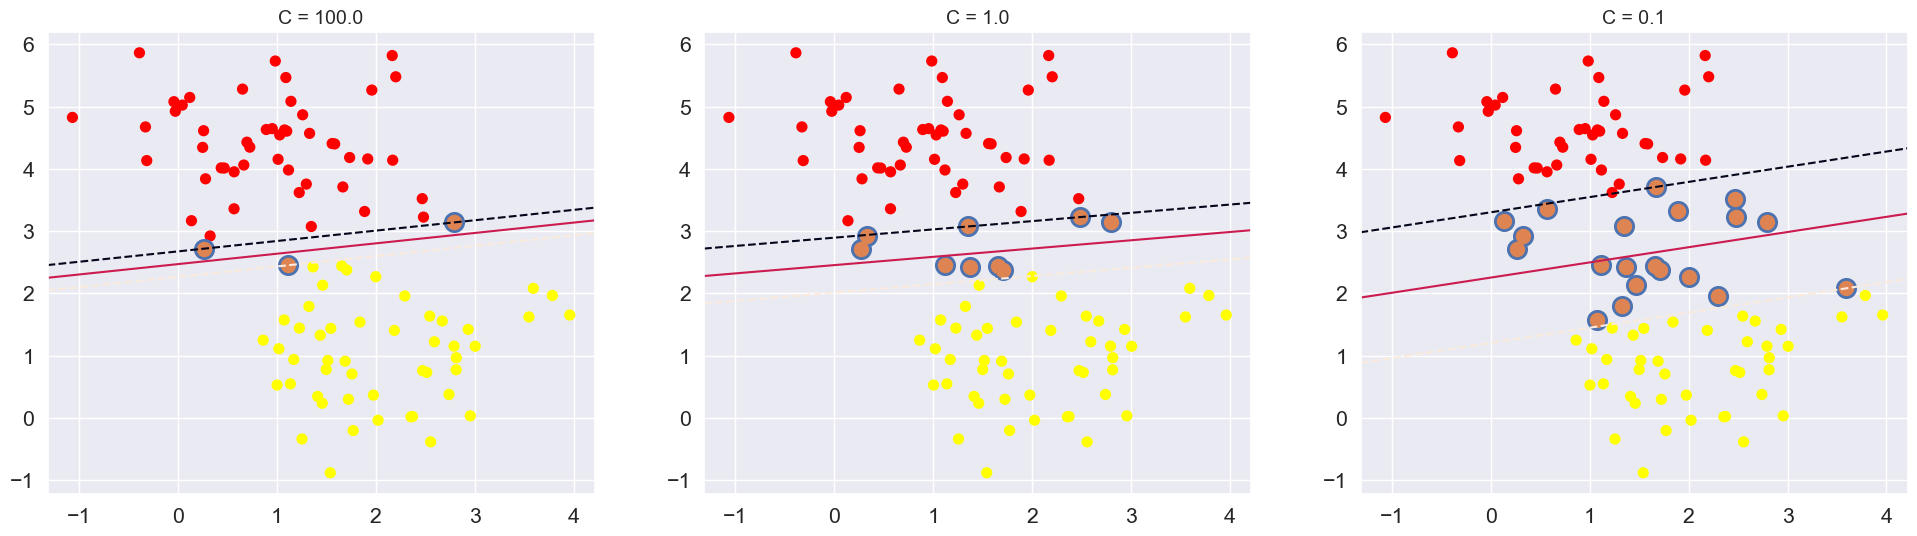

In [63]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

# linear
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
for axi, cost in zip(ax, [100, 1, 0.1]):
    model = SVC(kernel='linear', C=cost).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('C = {0:.1f}'.format(cost), size=14)

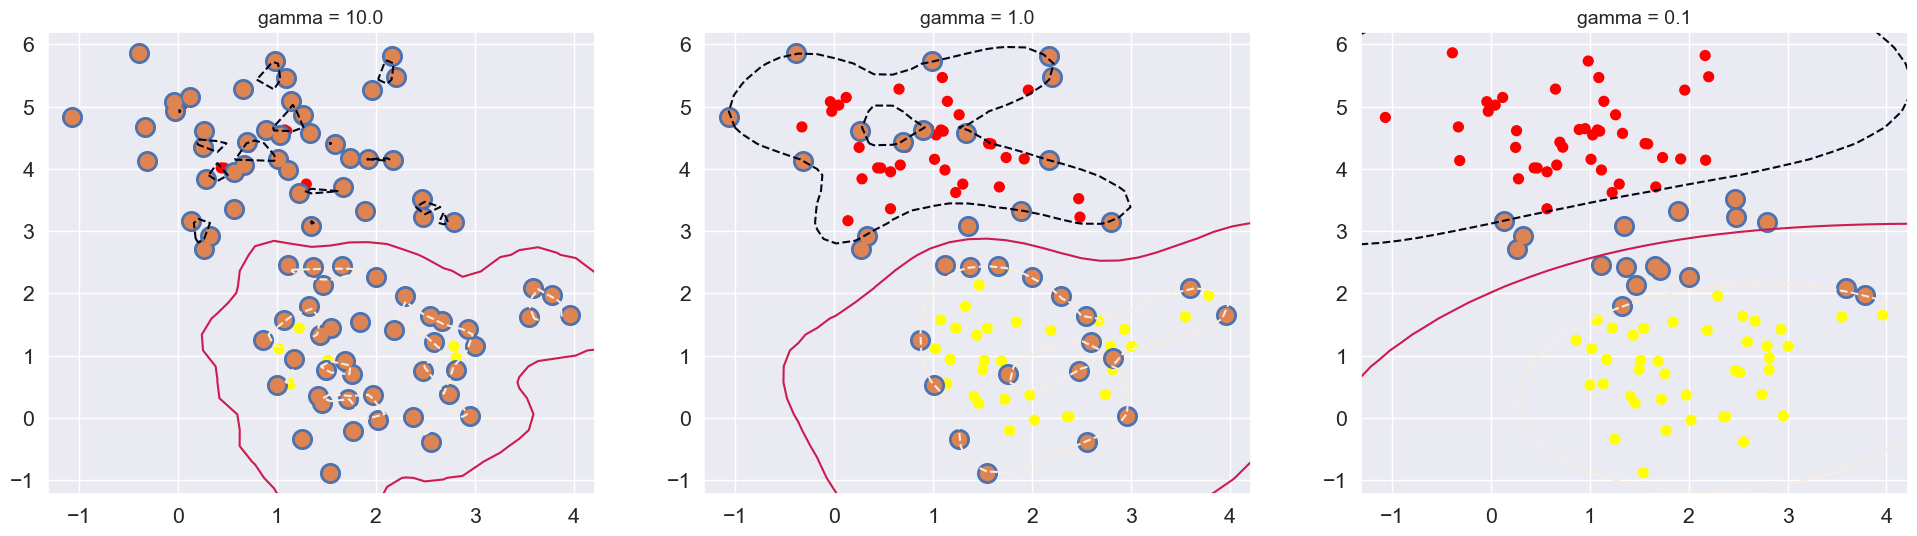

In [64]:
#  rbf
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
for axi, g in zip(ax, [10, 1, 0.1]):
    model = SVC(kernel='rbf',gamma=g).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('gamma = {0:.1f}'.format(g), size=14)

#### 오존량 예측

In [65]:
df = pd.read_csv("c:/vscode/data/ozone/ozone2.csv")

array([[<AxesSubplot:xlabel='Ozone', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Result', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Month', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Day', ylabel='Ozone'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Result'>,
        <AxesSubplot:xlabel='Result', ylabel='Result'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Result'>,
        <AxesSubplot:xlabel='Wind', ylabel='Result'>,
        <AxesSubplot:xlabel='Temp', ylabel='Result'>,
        <AxesSubplot:xlabel='Month', ylabel='Result'>,
        <AxesSubplot:xlabel='Day', ylabel='Result'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <Ax

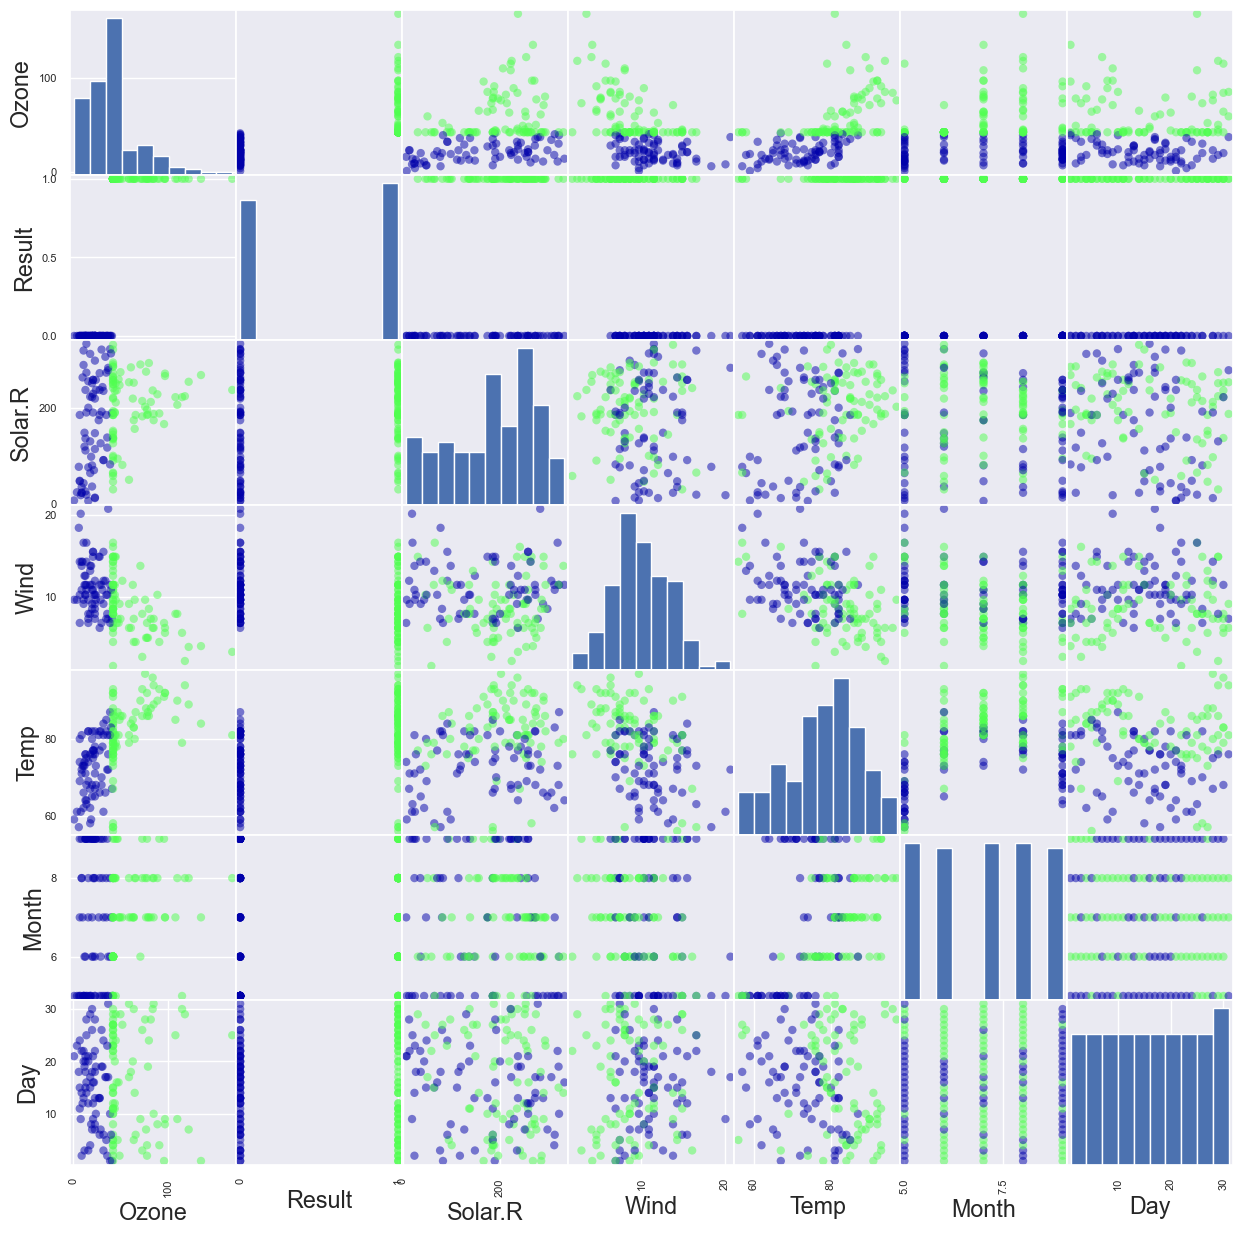

In [66]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15),marker='o', cmap=mglearn.cm3)

In [67]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [68]:
X = X_samp[cols]
y = y_samp['Result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

from sklearn.svm import SVC
model = SVC(random_state=10)
model.fit(X_train, y_train)

import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))
#과적합 발생

학습용: 0.6347826086956522
검증용: 0.6896551724137931
검증용: 0.6896551724137931


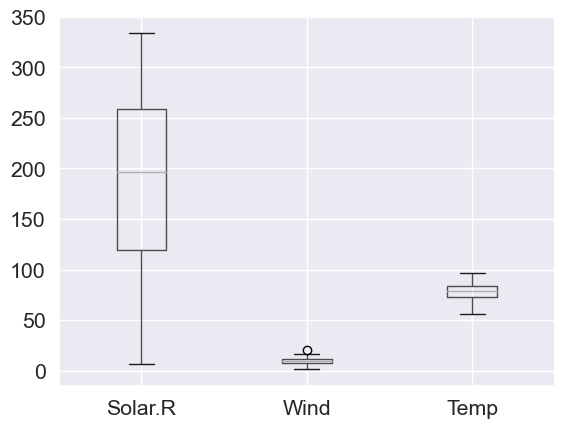

In [69]:
X_train.boxplot()
plt.show()

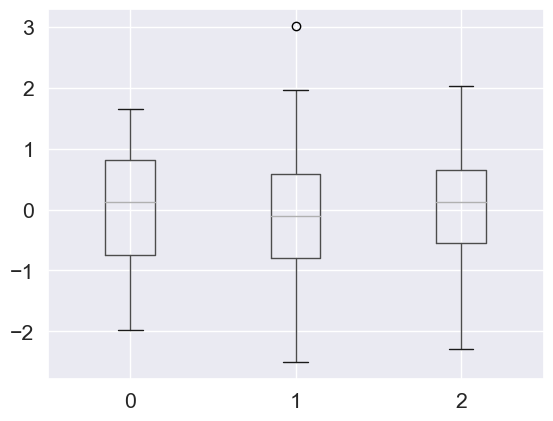

In [70]:
# 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = pd.DataFrame(ss.transform(X_train))
X_test_scaled = pd.DataFrame(ss.transform(X_test))

X_train_scaled.boxplot()
plt.show()

In [71]:
model = SVC(random_state=10)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#예측률이 개선됨

학습용: 0.7391304347826086
검증용: 0.8620689655172413


In [72]:
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]
for n in c_values:
    for g in g_values:
        # 모델 생성
        model = SVC(C=n,gamma=g,random_state=10)
        model.fit(X_train_scaled, y_train)
        # 학습용 데이터셋의 정확도
        train_rate.append([n,g,model.score(X_train_scaled, y_train)])
        # 검증용 데이터셋의 정확도
        test_rate.append([n,g,model.score(X_test_scaled, y_test)])

train_arr=np.array(train_rate) #검증용 데이터셋의 정확도
test_arr=np.array(test_rate) #검증용 데이터셋의 정확도
max_rate=np.max(test_arr[:,2]) #가장 좋은 정확도
idx=np.where(test_arr[:,2] == max_rate)[0][0] #가장 성능이 좋은 인덱스
print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])

최적의 c: 1
최적의 gamma: 0.1
최적의 정확도: 0.8620689655172413


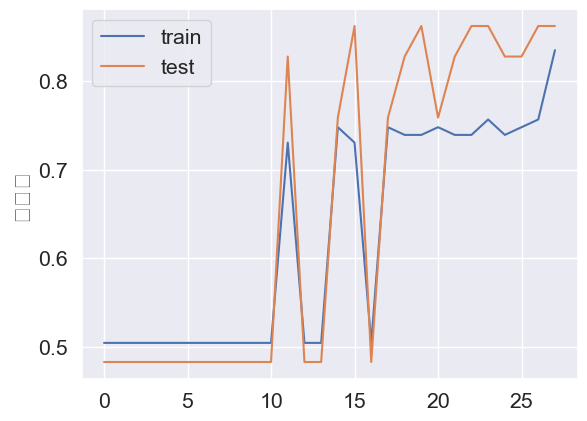

In [75]:
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2], label="train")
plt.plot(range(len(test_rate)), test_arr[:,2], label="test")
plt.ylabel("정확도")
plt.legend()

In [76]:
#최적의 C, gamma value를 적용한 모형
model = SVC(C=100,gamma=0.01,random_state=10)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#예측률이 개선됨

학습용: 0.7391304347826086
검증용: 0.8620689655172413


In [78]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[13,  1],
       [ 3, 12]], dtype=int64)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.92      0.80      0.86        15

    accuracy                           0.86        29
   macro avg       0.87      0.86      0.86        29
weighted avg       0.87      0.86      0.86        29



#### cross val score (교차검증)

In [81]:
df = pd.read_csv("c:/vscode/data/customer/customer.csv")

In [82]:
X=df[df.columns[:-1]]
y=df['Churn']

#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp=pd.DataFrame(data=X_sample,columns=df.columns[:-1])
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

<AxesSubplot:>

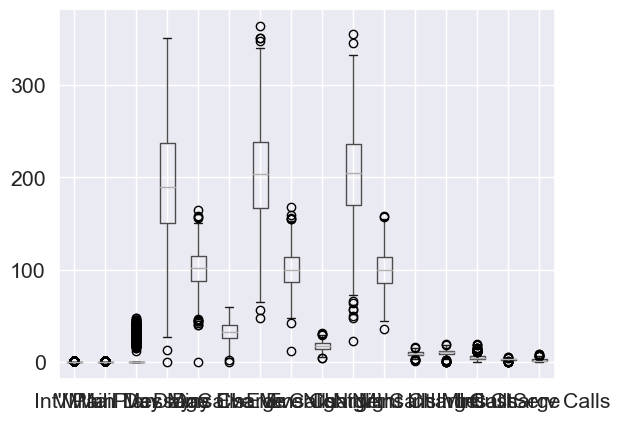

In [83]:
X=df_samp[df_samp.columns[:-1]]
y=df_samp['Churn']

X.boxplot()

<AxesSubplot:>

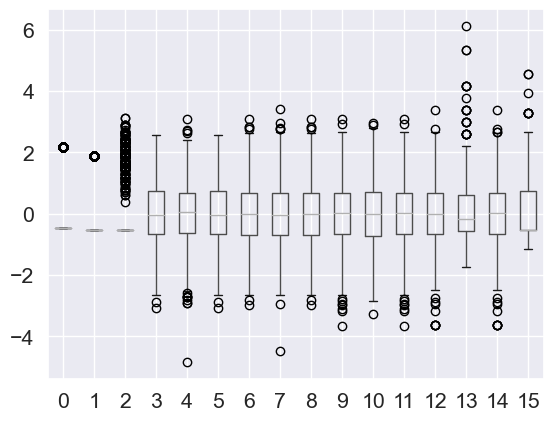

In [84]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

X_scaled.boxplot()

In [89]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

svm = SVC(random_state=10)
n_estimators = 10
model = BaggingClassifier(base_estimator=svm,
                            n_estimators=n_estimators,
                            max_samples=1/n_estimators)

from sklearn.model_selection import cross_val_score
costs = np.logspace(-10, 3, 14) # 10의 -10승부터 10의 3승까지 14개
scores = []
for c in costs:
    model.base_estimator.C = c
    #교차검증
    this_scores = cross_val_score(model, X_scaled, y, cv=3)
    m=np.mean(this_scores)
    print(c,'==>',m)
    scores.append(m)
print('max:',max(scores))
print('idx:',np.argmax(scores))
print('C:',costs[np.argmax(scores)])

1e-10 ==> 0.5
1e-09 ==> 0.5
1e-08 ==> 0.6335403726708074
1e-07 ==> 0.5
1e-06 ==> 0.5538302277432713
1e-05 ==> 0.5
0.0001 ==> 0.6873706004140786
0.001 ==> 0.5
0.01 ==> 0.6304347826086957
0.1 ==> 0.5
1.0 ==> 0.7826086956521738
10.0 ==> 0.8022774327122152
100.0 ==> 0.7950310559006212
1000.0 ==> 0.8053830227743272
max: 0.8053830227743272
idx: 13
C: 1000.0


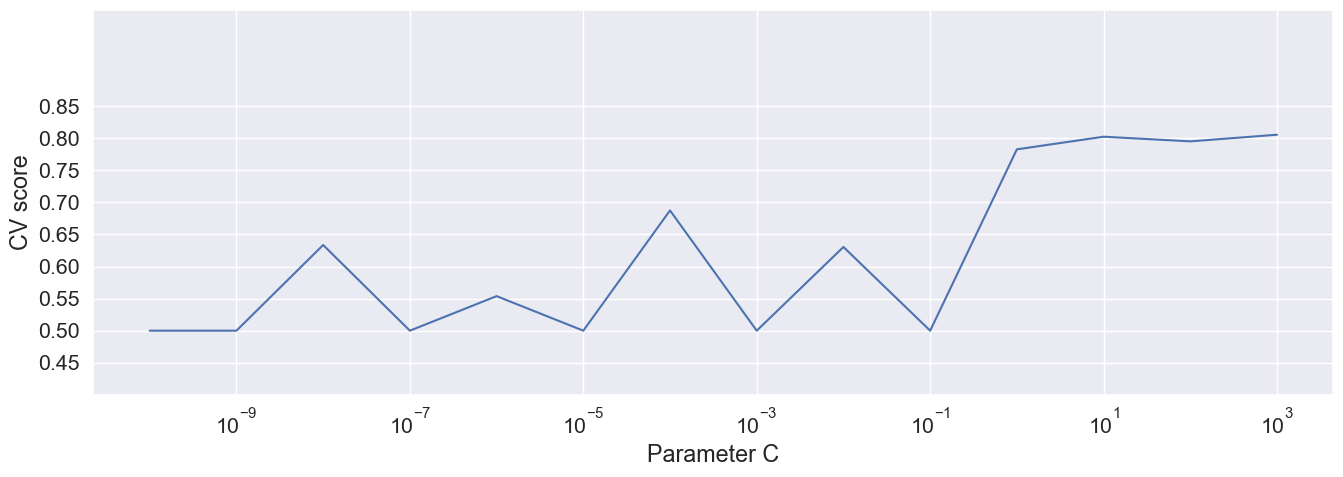

In [90]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(16,5)
plt.semilogx(costs, scores)
locs, labels = plt.yticks()
plt.yticks(locs)
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0.4, 1)
plt.show()

#### cross_val_score (교차검증) 2

In [91]:
df = pd.read_csv("c:/vscode/data/iris/iris.csv")

In [92]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

In [93]:
# svc
#같은 비율로 샘플링하는 KFold 모형
#회귀분석 : KFold, 분류: StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
i=1
train_scores=[]
test_scores=[]
for train_index, test_index in skf.split(X,y):
    print(i,'fold')
    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,]
    y_train, y_test = y[train_index], y[test_index]
    model = SVC(random_state=10)
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    print(score)
    train_scores.append(score)
    score = model.score(X_test, y_test)
    print(score)
    test_scores.append(score)
    i+=1

print('\naverage')
print(np.mean(train_scores))
print(np.mean(test_scores))

1 fold
0.9666666666666667
1.0
2 fold
0.9583333333333334
1.0
3 fold
0.975
0.9333333333333333
4 fold
0.9833333333333333
0.9333333333333333
5 fold
0.9666666666666667
1.0

average
0.97
0.9733333333333334


In [94]:
# knn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
kf = StratifiedKFold(5, shuffle=True, random_state=0)
k_range = list(range(1, 11))
means_tr = []
means_te = []
for k in k_range:
    train_scores = []
    test_scores = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for train, test in kf.split(X,y):
        X_train, X_test, y_train, y_test = X.iloc[train,], X.iloc[test,], y[train], y[test]
        knn.fit(X_train, y_train)
        score = knn.score(X_train, y_train)
        train_scores.append(score)
        score = knn.score(X_test, y_test)
        test_scores.append(score)
        #print('k: %d, test score : %f' % (k, score))
    mean_tr=np.mean(train_scores)
    mean_te=np.mean(test_scores)
    print("K : %d, train score's mean %f" % (k, mean_tr))
    print("K : %d, test score's mean %f" % (k, mean_te))
    means_tr.append(mean_tr)
    means_te.append(mean_te)
    
max_score=max(means_te)
print('최고 정확도:',max_score)
idx=np.where(means_te==max_score)[0][0]
print('최적의 k:',k_range[idx])

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

K : 1, train score's mean 1.000000
K : 1, test score's mean 0.960000
K : 2, train score's mean 0.976667
K : 2, test score's mean 0.953333
K : 3, train score's mean 0.965000
K : 3, test score's mean 0.960000
K : 4, train score's mean 0.973333
K : 4, test score's mean 0.960000
K : 5, train score's mean 0.970000
K : 5, test score's mean 0.953333


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

K : 6, train score's mean 0.975000
K : 6, test score's mean 0.953333
K : 7, train score's mean 0.980000
K : 7, test score's mean 0.960000
K : 8, train score's mean 0.973333
K : 8, test score's mean 0.966667
K : 9, train score's mean 0.976667
K : 9, test score's mean 0.960000
K : 10, train score's mean 0.975000
K : 10, test score's mean 0.960000
최고 정확도: 0.9666666666666668
최적의 k: 8


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


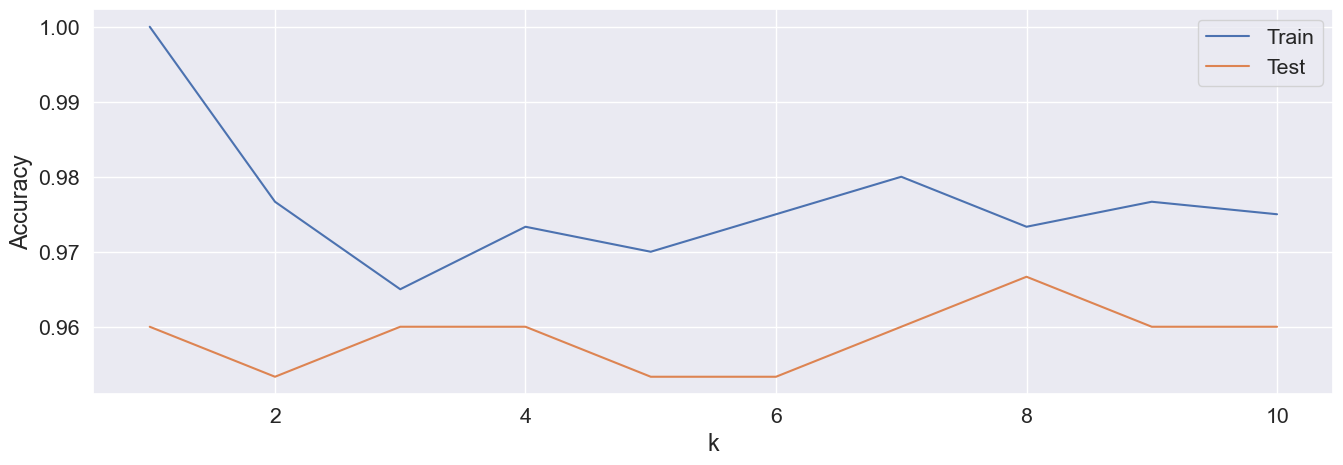

In [95]:
plt.rcParams["font.size"]=15
plt.plot(k_range, means_tr, label="Train")
plt.plot(k_range, means_te, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()

In [96]:
from sklearn.model_selection import cross_val_score
svm = SVC(random_state=0)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
#교차검증을 자동으로 수행하는 함수
result=cross_val_score(svm, X, y, cv=skf)
print(result)
print(np.mean(result)*100)

[1.         1.         0.93333333 0.93333333 1.        ]
97.33333333333334


#### 변수의 중요도

In [1]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/customer/customer.csv")

In [3]:
cols=["Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins',
'Day Calls','Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
'Night Mins','Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge','CustServ Calls']
X=df[cols]
y=df['Churn']

In [4]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp['Churn'].value_counts()

X=df_samp[cols]
y=df_samp['Churn']

In [5]:
#스케일링
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

<AxesSubplot:>

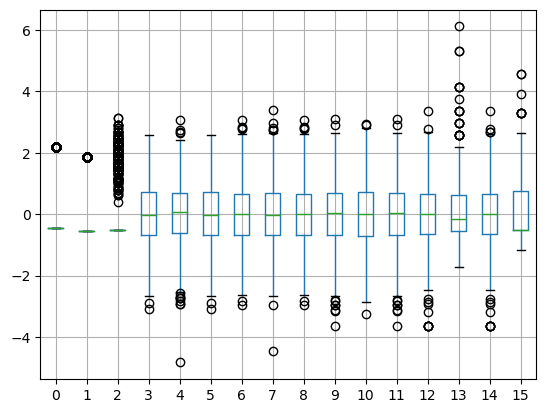

In [9]:
X_scaled.boxplot()

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import numpy as np

svm = SVC(random_state=0).fit(X, y)
#rf = RandomForestClassifier(random_state=0).fit(X, y)
#모형을 만드는데 사용된 변수들의 특성 중요도 - 트리 알고리즘에 더욱 적합한 방법

result = permutation_importance(svm, X, y, n_repeats=10, random_state=0,n_jobs=-1)
importances = np.array(list(zip(X.columns, result.importances_mean)))
df2=pd.DataFrame(importances)

In [10]:
df2=pd.DataFrame(importances, columns=['variable','importance'])
df2.sort_values('importance', ascending=False)

,variable,importance
3,Day Mins,0.15186335403726708
6,Eve Mins,0.052380952380952375
12,Intl Mins,0.003209109730848847
10,Night Calls,0.0026915113871635588
9,Night Mins,0.0025879917184264967
4,Day Calls,0.0025879917184264854
2,VMail Message,0.0023809523809523725
7,Eve Calls,0.002277432712215344
13,Intl Calls,0.001138716356107683
15,CustServ Calls,0.001138716356107683


In [7]:
sorted_idx = result.importances_mean.argsort()
print(importances[sorted_idx[::-1]])

[['Day Mins' '0.15186335403726708']
 ['Eve Mins' '0.052380952380952375']
 ['Intl Mins' '0.003209109730848847']
 ['Night Calls' '0.0026915113871635588']
 ['Night Mins' '0.0025879917184264967']
 ['Day Calls' '0.0025879917184264854']
 ['VMail Message' '0.0023809523809523725']
 ['Eve Calls' '0.002277432712215344']
 ['CustServ Calls' '0.001138716356107683']
 ['Intl Calls' '0.001138716356107683']
 ['Intl Charge' '0.0010351966873706209']
 ['Eve Charge' '0.0008281573498964967']
 ['Day Charge' '0.00041407867494823724']
 ['Night Charge' '0.0']
 ['VMail Plan' '0.0']
 ["Int'l Plan" '0.0']]


* 변수 선택

In [11]:
#시간이 오래 걸림
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# 선형모형만 가능함(rbf 커널에는 coef가 제공되지 않음)
svc = SVC(kernel="linear")
# step=1 각 단계에서 제거할 변수의 개수
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [ ]:
# 로지스틱은 수동으로 후진제거해야하는데, 
# svc는 자동으로 제거해서 결과내줌.

In [12]:
import numpy as np
print(np.mean(rfecv.grid_scores_,axis=1)) #교차검증으로 계산한 변수들의 중요도
print(rfecv.n_features_) #교차검증을 통해 선택된 변수 개수
print(rfecv.support_) #변수 선택 여부
print(rfecv.ranking_) #변수 선택 랭킹

#선택된 변수들
print(X.columns[rfecv.support_])

#선택되지 않은 변수들
print(X.columns.difference(X.columns[rfecv.support_]))
df2=pd.DataFrame(list(zip(X.columns,np.mean(rfecv.grid_scores_,axis=1))),columns=['변수명','평균점수'])
df2

[0.6097217  0.66975055 0.69358474 0.69463704 0.70392607 0.73391913
 0.74842156 0.7484269  0.75154105 0.76812136 0.76500721 0.75983121
 0.7660328  0.76603814 0.76500721 0.76500721]
10
[ True  True  True  True False False False False  True False False  True
  True  True  True  True]
[1 1 1 1 5 2 4 6 1 3 7 1 1 1 1 1]
Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Eve Charge',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')
Index(['Day Calls', 'Day Charge', 'Eve Calls', 'Eve Mins', 'Night Calls',
       'Night Mins'],
      dtype='object')


c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


,변수명,평균점수
0,Int'l Plan,0.609722
1,VMail Plan,0.669751
2,VMail Message,0.693585
3,Day Mins,0.694637
4,Day Calls,0.703926
5,Day Charge,0.733919
6,Eve Mins,0.748422
7,Eve Calls,0.748427
8,Eve Charge,0.751541
9,Night Mins,0.768121


In [13]:
df2.sort_values(by='평균점수', ascending=False)

,변수명,평균점수
9,Night Mins,0.768121
13,Intl Calls,0.766038
12,Intl Mins,0.766033
10,Night Calls,0.765007
14,Intl Charge,0.765007
15,CustServ Calls,0.765007
11,Night Charge,0.759831
8,Eve Charge,0.751541
7,Eve Calls,0.748427
6,Eve Mins,0.748422


#### validation curve

In [15]:
df=pd.read_csv('c:/vscode/data/rides/rides2.csv')

In [16]:
cols=['weekend', 'num.child', 'distance', 'rides', 'games',
'wait', 'clean']
X=df[cols]
y=df['overall']

In [24]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['overall'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
X=df_samp[cols]
y=df_samp['overall']

<AxesSubplot:>

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)
df_ss = pd.DataFrame(ss.transform(X),columns=X.columns)
df_ss

,weekend,num.child,distance,rides,games,wait,clean
0,1.033204,-1.159150,2.715919,0.222582,-0.684357,-0.907906,0.232027
1,1.033204,-1.159150,-0.147105,0.405270,-0.807778,-0.351234,0.232027
2,-0.967863,2.174087,-0.251336,-0.873549,0.056169,-2.021251,-1.724830
3,1.033204,-0.492503,-0.123242,-1.604302,-0.684357,-1.093464,-0.550716
4,-0.967863,-1.159150,-0.618469,-0.690860,-1.054620,0.019881,-0.942087
...,...,...,...,...,...,...,...
485,1.033204,0.174145,0.343347,1.866777,1.166959,0.390996,1.797513
486,1.033204,0.174145,-0.285608,-0.325484,-0.314094,1.226005,-0.159344
487,-0.967863,0.840792,-0.733693,2.049465,0.673275,-1.279021,1.601828
488,1.033204,1.507440,-0.195983,1.684088,2.154327,1.318783,1.601828


In [21]:
X=df_ss[cols]

In [22]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve 
# validation_curve : 파라미터 한개씩만 가능, 대신 그래프 그리기 가능

#10의 -6승부터 3승까지 10개의 값
param_range = np.logspace(-6, 3, 10)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma",
            param_range=param_range,scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

#최고 정확도
print(np.max(test_scores_mean))
#최적의 gamma
print(param_range[np.argmax(test_scores_mean)])

0.7938775510204081
0.1


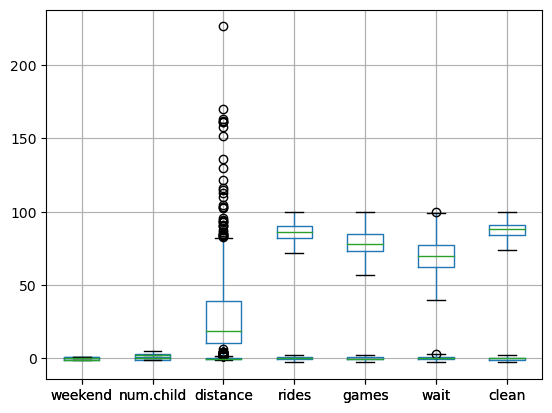

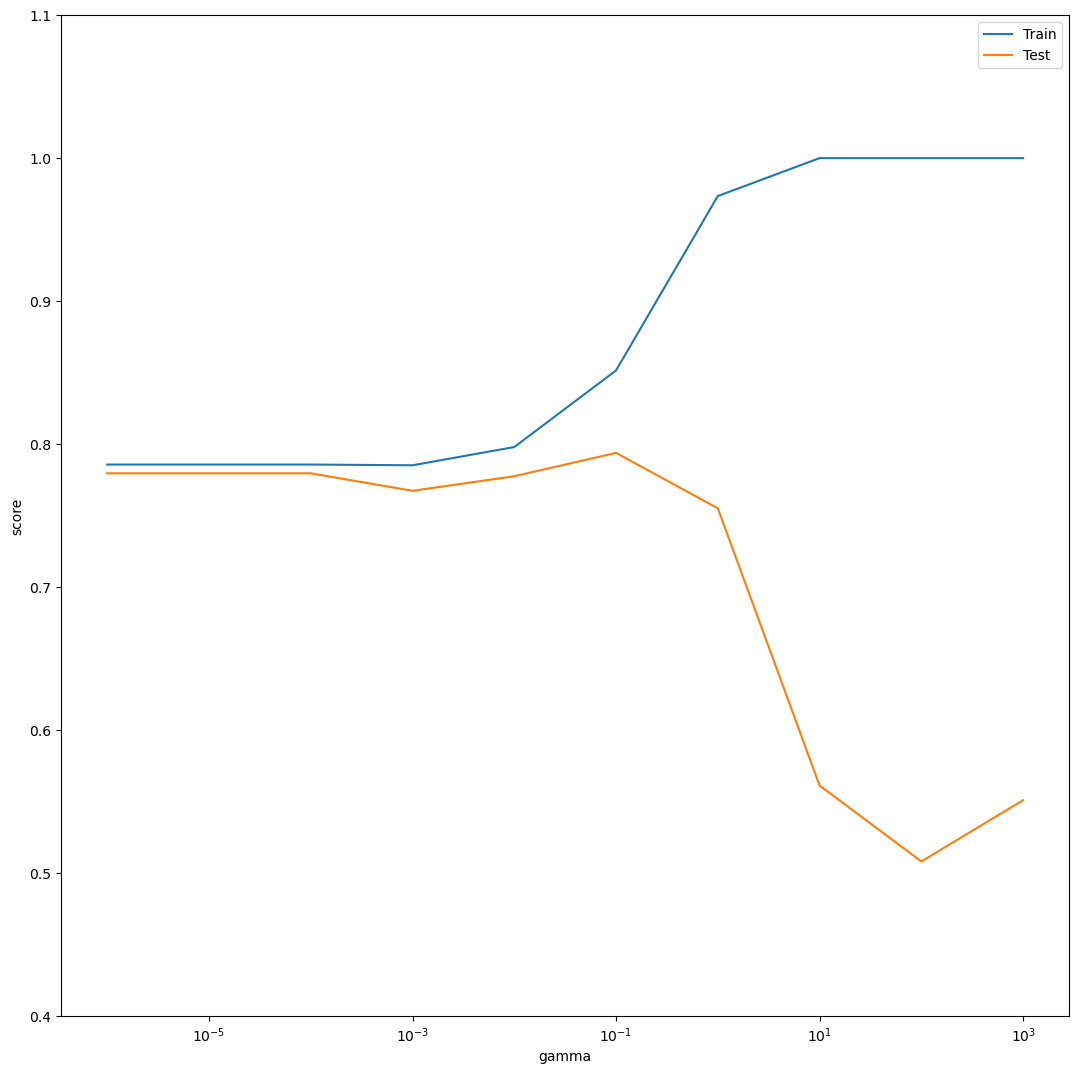

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 13))
plt.xlabel('gamma')
plt.ylabel("score")
plt.ylim(0.4, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Train")
plt.semilogx(param_range, test_scores_mean, label="Test")
plt.legend(loc="best")
plt.show()

#### ROC curve

In [51]:
df=pd.read_csv('c:/vscode/data/titanic/data.csv')

In [52]:
cols=['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A',
'deck_B','deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
'embarked_C','embarked_Q', 'embarked_S']
X=df[cols]
y=df['survived']

In [53]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

X=df2[cols]
y=df2['survived']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,stratify=y, random_state=0)

In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [56]:
# 1. logit
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0)
logit.fit(X_train_scaled, y_train)

# 2. rf
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train_scaled, y_train)

# 3. kn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

# 4. mlp (신경망)
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=0,max_iter=1000)
ann.fit(X_train_scaled, y_train)

# 5. svc
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train_scaled, y_train)

SVC(random_state=0)

In [57]:
print(logit.score(X_test_scaled, y_test))
print(rf.score(X_test_scaled, y_test))
print(knn.score(X_test_scaled, y_test))
print(ann.score(X_test_scaled, y_test))
print(svm.score(X_test_scaled, y_test))

0.8394160583941606
0.8175182481751825
0.8029197080291971
0.7956204379562044
0.8394160583941606


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


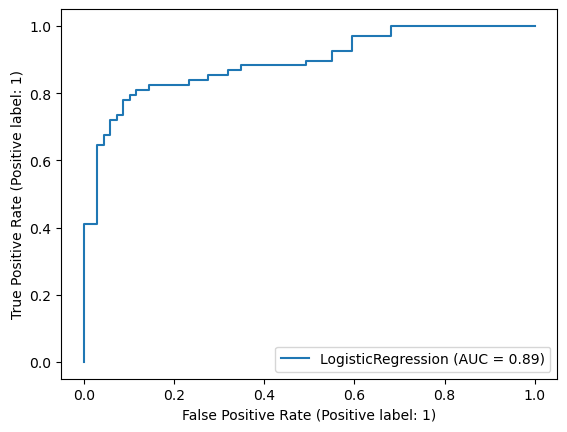

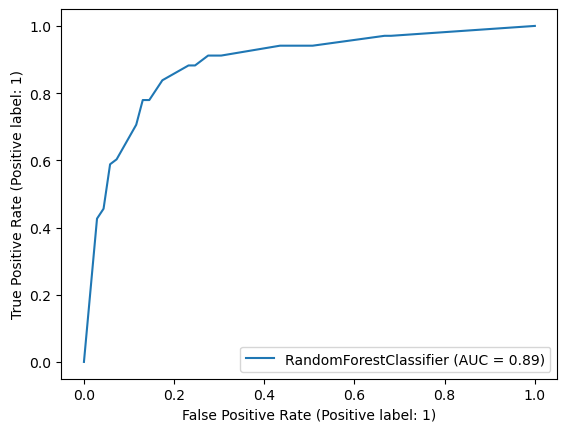

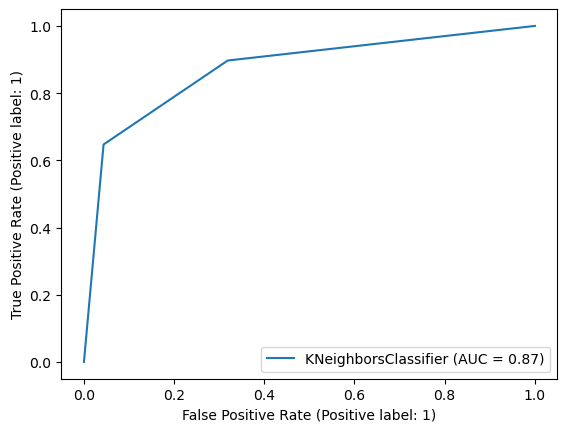

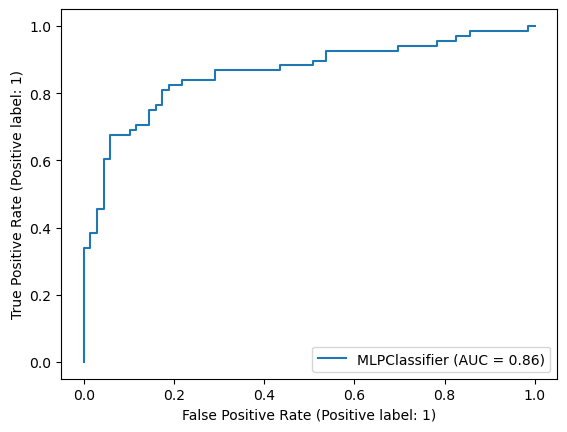

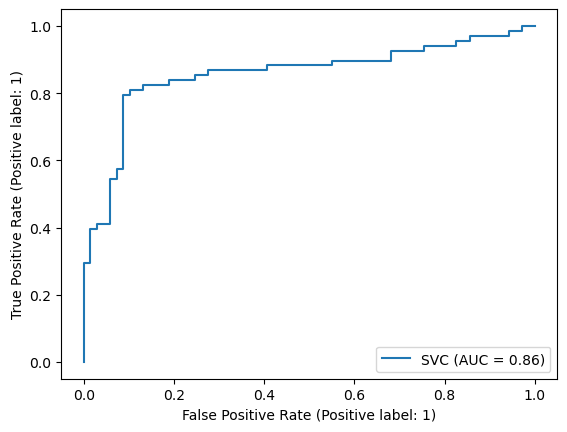

In [58]:
%matplotlib inline
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logit, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(ann, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)

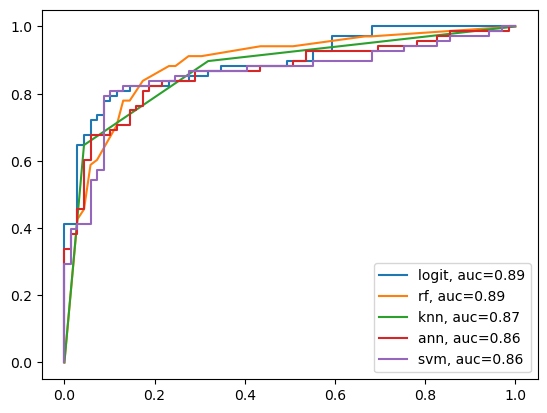

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt 

pred=logit.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="logit, auc="+str(f'{auc:.2f}'))

pred=rf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="rf, auc="+str(f'{auc:.2f}'))

pred=knn.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="knn, auc="+str(f'{auc:.2f}'))

pred=ann.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="ann, auc="+str(f'{auc:.2f}'))

pred=svm.decision_function(X_test_scaled)
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="svm, auc="+str(f'{auc:.2f}'))

plt.legend()
plt.show()

#### precision recall curve

In [62]:
df = pd.read_csv("c:/vscode/data/soccer/player.csv")

In [63]:
cols=[ 'age', 'height',
'weight', 'potential', 'right_foot', 'left_foot',
'crossing','finishing', 'heading_accuracy', 'short_passing',
'volleys','dribbling', 'curve', 'free_kick_accuracy',
'long_passing','ball_control', 'acceleration', 'sprint_speed',
'agility', 'reactions','balance', 'shot_power', 'jumping',
'stamina', 'strength', 'long_shots','aggression',
'interceptions', 'positioning', 'vision', 'penalties','marking',
'standing_tackle', 'sliding_tackle', 'gk_diving','gk_handling',
'gk_kicking', 'gk_positioning', 'gk_reflexes']
X=df[cols]
y=df['Label']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2,stratify=y, random_state=0)

In [65]:
from sklearn.preprocessing import RobustScaler
#중앙값(median) 0, IQR(interquartile range, Q3-Q1) 1이 되도록 변환
scaler= RobustScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

svm = SVC()
n_estimators = 10
model = BaggingClassifier(base_estimator=svm,
        n_estimators=n_estimators,
        max_samples=1/n_estimators,
        n_jobs=-1)
model.fit(X_train_scaled,y_train)
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.9223822588020119
0.9218106995884774


In [67]:
from sklearn.metrics import classification_report
pred = model.predict(X_test_scaled)
print(classification_report(y_test,pred))
y_score = model.decision_function(X_test_scaled)
y_score

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1046
           1       0.92      0.93      0.93      1141

    accuracy                           0.92      2187
   macro avg       0.92      0.92      0.92      2187
weighted avg       0.92      0.92      0.92      2187



array([-0.18592771,  2.40083554,  0.92867589, ...,  2.8965334 ,
       -0.54214577, -0.87606504])

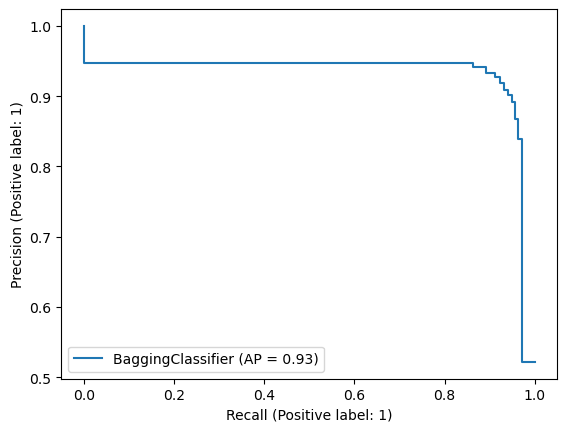

In [68]:
# 판별함수값으로 구한 precision 평균 점수
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_score)

from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_test_scaled, y_test)

#### GridSearchCV

In [70]:
iris_data = pd.read_csv("c:/vscode/data/iris/iris.csv", encoding="utf-8")

In [71]:
X = iris_data.loc[:, ["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
y = iris_data.loc[:,"Species"]

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#StandardScaler() 표준화 처리 함수
#scl : 스케일러, clf : 분류모형
pipe_svc = Pipeline([('scl', StandardScaler()), 
                     ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
params = [{'clf__C': param_range, 'clf__kernel': ['linear']},
        {'clf__C': param_range, 'clf__gamma': param_range,
        'clf__kernel': ['rbf']}]

In [73]:
# cv 교차검증 횟수
gs = GridSearchCV(estimator=pipe_svc, param_grid=params,
                    scoring='accuracy', cv=10)

# 시간측정
%time gs = gs.fit(X, y)

#GridSearchCV 모형
print(gs)
print(gs.best_params_)#최적의 파라미터
print(gs.best_estimator_) #최적의 모형

Wall time: 3.93 s
GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', SVC(random_state=1))]),
             param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__kernel': ['linear']},
                         {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0, 1000.0],
                          'clf__kernel': ['rbf']}],
             scoring='accuracy')
{'clf__C': 1.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
Pipeline(steps=[('scl', StandardScaler()),
                ('clf', SVC(gamma=0.1, random_state=1))])


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                test_size=0.2, stratify=y,random_state=10)

from sklearn.metrics import accuracy_score
y_pred = gs.predict(X_test)
print("최종 정확도:" , accuracy_score(y_test, y_pred))

최종 정확도: 1.0


In [75]:
#최적의 파라미터로 만든 모형
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

model = SVC(random_state=1,C=10, gamma=0.01, kernel='rbf')
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=10)
result=cross_val_score(model,X,y,cv=skf)
print(result)
print(np.mean(result)*100)

[1.         1.         1.         1.         0.86666667 1.
 0.93333333 0.93333333 1.         1.        ]
97.33333333333334
